# Credit Card Fraud Detection

### Introduction

Kaggle Dataset Link https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

Credit card fraud detection is one of the most important issues for credit card companies to deal with in order to earn trust from its customers.This data set is Credit Card Fraud Detection from Kaggle. The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

## 1- Data Reading & Understanding

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import presentation as p

In [3]:
path = "../YOUR-DATA-IS-MINE/Data/creditcard.csv"
df = pd.read_csv(path)
print('Now the Dataset is ready to use')


Now the Dataset is ready to use


In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Exploratory Data Analysis


Due to security issues, the original features V1, V2, ... V28 have been modified by PCA. However, we can guess that these features could be credit card number, expiration date, CVV, cardholder name, transaction location, transaction datetime, etc. The only two features that have not been converted with PCA are Time and Amount. Therefore, we only need to focus on processing these two features

In [7]:
df.shape

(284807, 31)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### MISSING VALUES : No values are missing.

This dataset has 29 float variables, 1 target variable is int .

In [9]:
# Check missing values
droppedna = df.dropna() # drop the rows that have at least one element missing
droppedna.shape # Verify the dimension of the data and it is the same as the original dimension

(284807, 31)

In [10]:
total =df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Time,V16,Amount,V28,V27,V26,V25,V24,V23,V22,...,V10,V9,V8,V7,V6,V5,V4,V3,V2,Class
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [12]:
df[['Time','Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


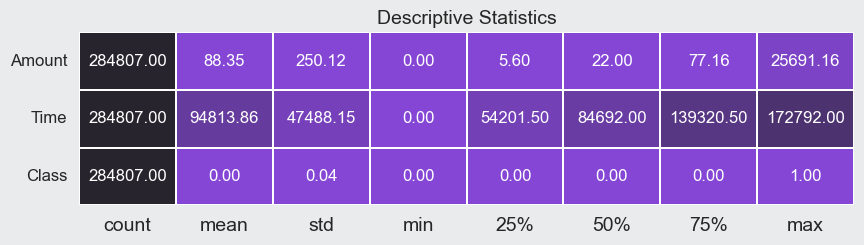

In [28]:

cols =df[["Amount","Time","Class"]]
cmap1 = p.Colors.purples_cr
def desc_stats(dataframe):
    desc = dataframe.describe().T
    f,ax = plt.subplots(figsize=(10,
                                 desc.shape[0] * 0.75))
    sns.heatmap(desc,
                annot = True,
                cmap = cmap1,
                fmt= '.2f',
                ax = ax,
                linecolor = 'white',
                linewidths = 1.3,
                cbar = False,
                annot_kws = {"size": 12})
    plt.xticks(size = 14)
    plt.yticks(size = 12,
               rotation = 0)
    plt.title("Descriptive Statistics", size = 14)
    plt.show()
    
desc_stats(cols)





### Observations:

1.On average, each transaction happens every 94813s and 284,807 transactions are recorded

2.The average transaction amount is 88.34 with a standard deviation of 250, the maximum transaction amount is 25691 which might require further investigation for potential fraud.

Quartiles:
25% of transactions occur before the 54,201 second and are below 5.60 in amount.
50% of transactions occur before the 84,692nd second and are below 22.00 in amount.
75% of transactions occur before the 139,322 second and are below 77.17 in amount.

Understanding these statistics helps in identifying normal transaction patterns and detecting anomalies that could indicate fraudulent activity.

In [14]:
Fraud_activity_count = len(df[df['Class'] == 1])
Genuine_activity_count = len(df[df['Class'] == 0])

In [15]:
activity = ['Genuine', 'Fraud']
count = [Genuine_activity_count, Fraud_activity_count]
activity_distribution = pd.DataFrame({'Activity': activity,
                                     'Count': count})

activity_distribution

,Activity,Count
0,Genuine,284315
1,Fraud,492


In [16]:
df['Class'].value_counts()/len(df)

Class
0    0.998273
1    0.001727
Name: count, dtype: float64

/var/folders/2q/0pwcfscs4hgf9m7q4fgf8qf80000gn/T/ipykernel_11264/1192577893.py:3: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  ax = sns.countplot(x= 'Class',  hue= 'Class', data=df ,  palette=p.Colors.blues )


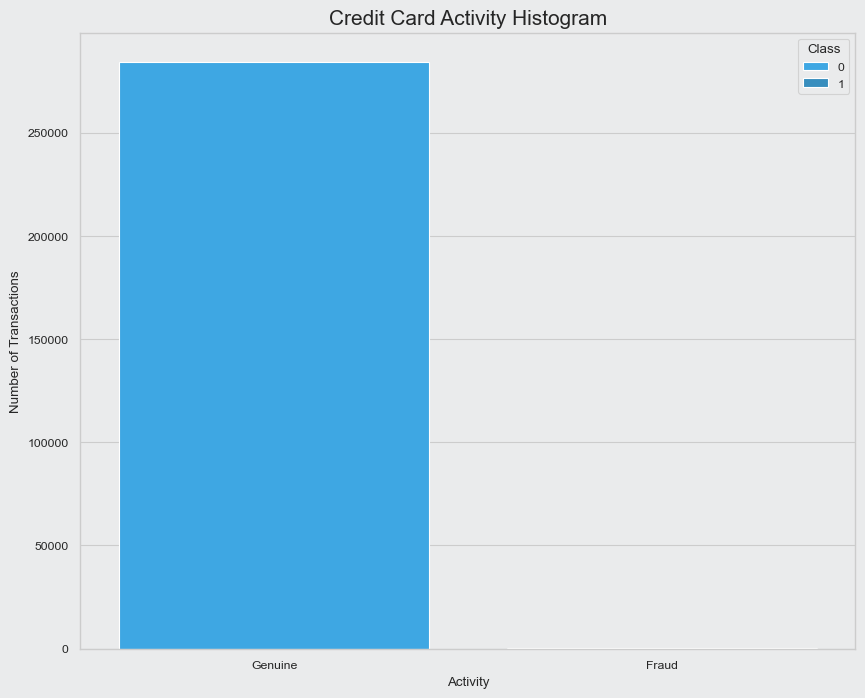

In [17]:
f,ax = plt.subplots(figsize=(10,8))

ax = sns.countplot(x= 'Class',  hue= 'Class', data=df ,  palette=p.Colors.blues )
plt.title("Credit Card Activity Histogram" , fontsize=15)
plt.xlabel("Activity")
plt.ylabel("Number of Transactions") 
plt.xticks(range(2),['Genuine','Fraud'])
plt.show()



### Data Visualization

#### This dataset contains transaction information with 492 TH frauds out of a total of 284,807 transactions. This is a severely imbalanced dataset with the positive class (fraud) accounting for 0.172% of all transactions

In [18]:

fraud = df[df['Class']==1]
normal = df[df['Class']==0]
print(f'Shape of Fraud Transactions: {fraud.shape}')
print(f'Shape of Genuine Transactions: {normal.shape}')

Shape of Fraud Transactions: (492, 31)
Shape of Genuine Transactions: (284315, 31)


#### 1.1  Bar Chart to visualize data distribution b/w both classes

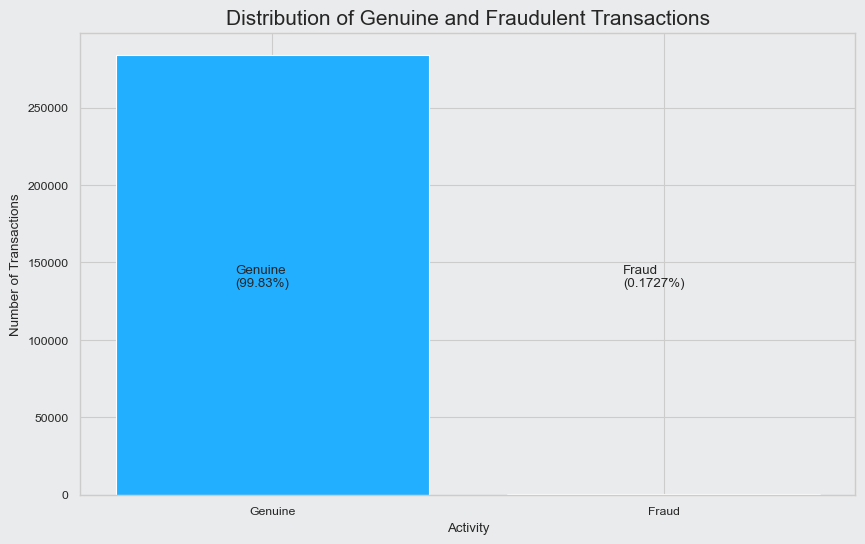

In [19]:
# Assuming the dataset has a column 'Class' where 1 indicates fraud and 0 indicates genuine

activity_distribution = df['Class'].value_counts().reset_index()
activity_distribution.columns = ['Activity', 'Count']

# Mapping the activity labels for better readability
activity_labels = {0: 'Genuine', 1: 'Fraud'}
activity_distribution['Activity'] = activity_distribution['Activity'].map(activity_labels)

# Bar chart
activity = activity_distribution['Activity']
count = activity_distribution['Count']

plt.figure(figsize=(10, 6))
plt.bar(activity, count, color=p.Colors.blues)
plt.title('Distribution of Genuine and Fraudulent Transactions' , fontsize=15)
plt.annotate('{}\n({:.4}%)'.format(activity_labels[0], 
                                         df['Class'].value_counts()[0]/df['Class'].count()*100),
             (0.20, 0.45), xycoords='axes fraction')
plt.annotate('{}\n({:.4}%)'.format(activity_labels[1], 
                                         df['Class'].value_counts()[1]/df['Class'].count()*100),
             (0.70, 0.45), xycoords='axes fraction')
plt.xlabel('Activity')
plt.ylabel("Number of Transactions") 
plt.show()

#### 1.2 Correlation of all features with target variable(Class)

In [20]:
df.corrwith(df['Class']).sort_values(ascending=False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
dtype: float64

#### 1.3 Visualize Correlation(Bar Chart)

Text(0, 0.5, 'Correlation Coefficient')

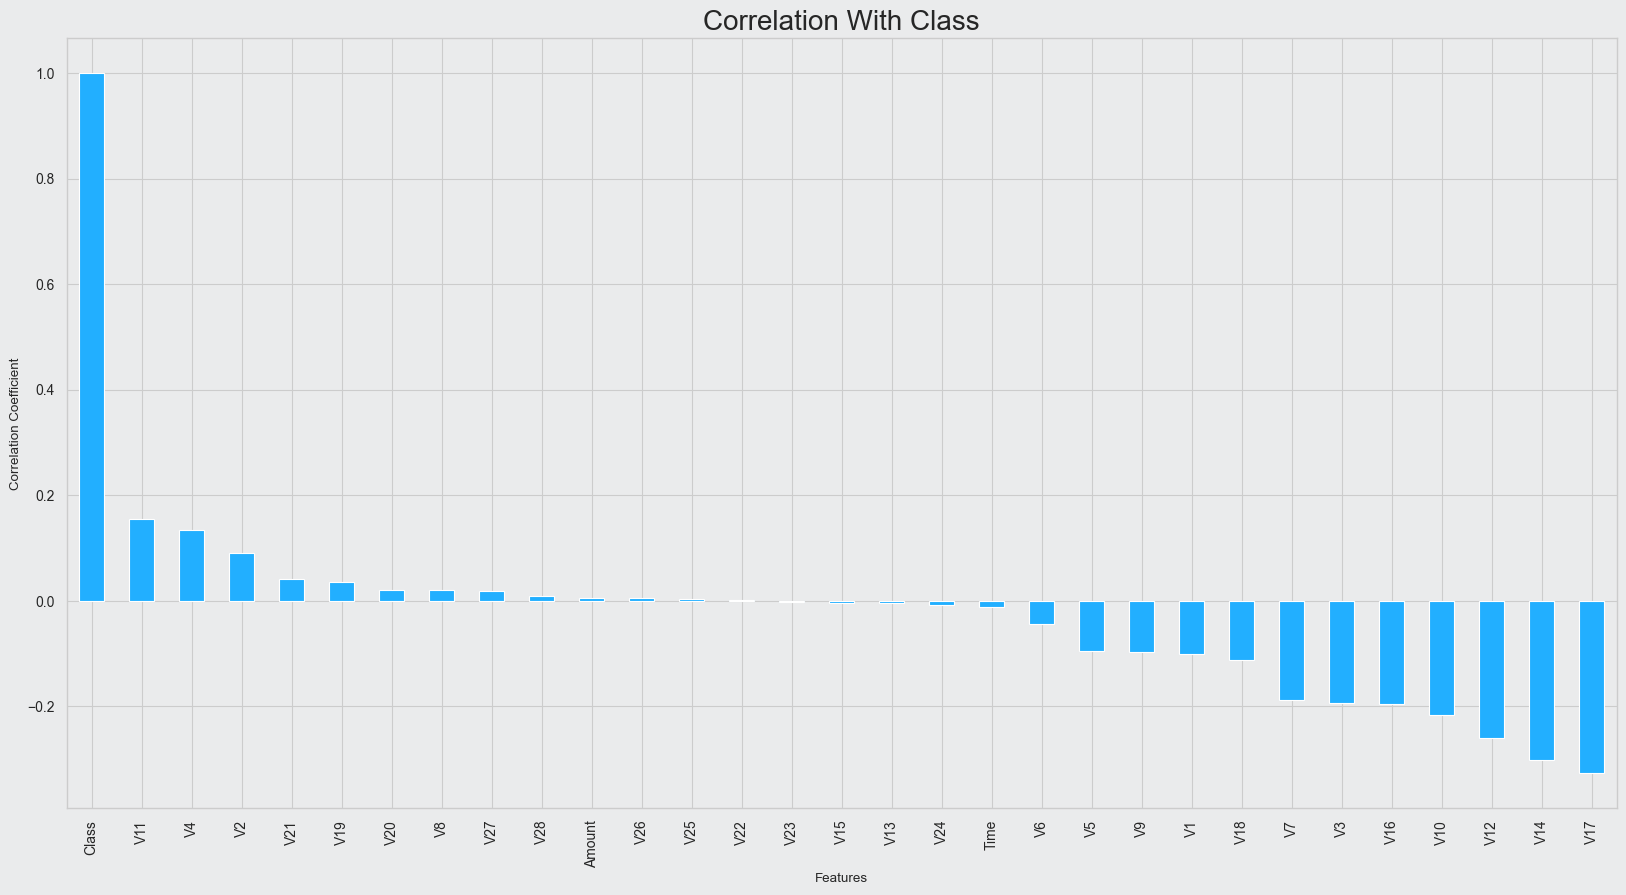

In [21]:
df.corrwith(df['Class']).sort_values(ascending=False).plot.bar(
        figsize = (20, 10), color=p.Colors.blue , fontsize = 10),
plt.title("Correlation With Class" , fontsize=20)
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")


### Correlation matrix 



#### 1.1  This code will generate a heatmap that only shows positive correlations between the variables in the credit card fraud dataset, helping to visualize which features are positively correlated with each other.

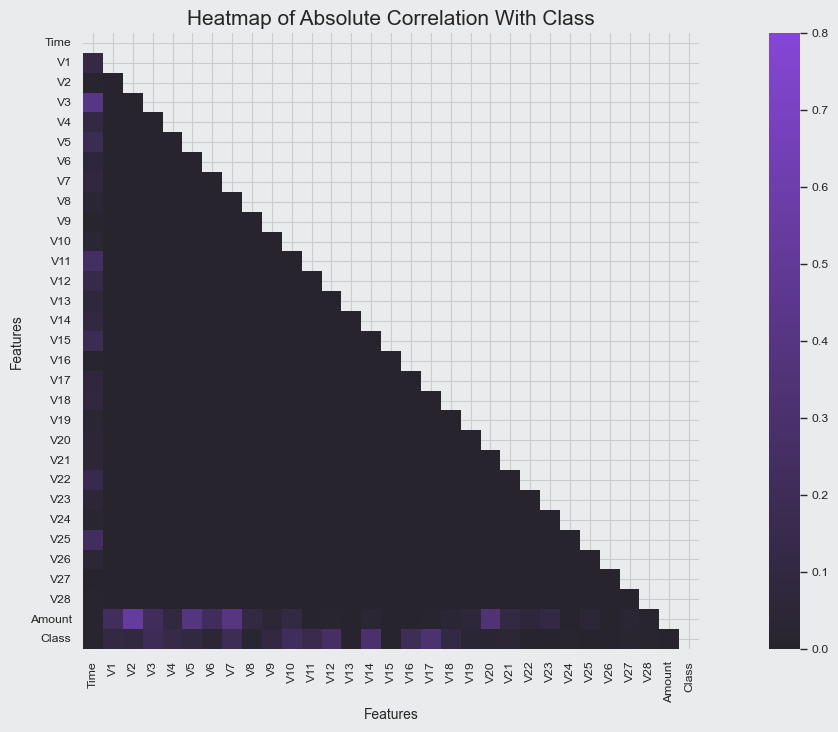

In [22]:
# Calculate the correlation matrix
corr = np.abs(df.corr())

f, ax1 = plt.subplots(1,1,figsize =( 18, 8))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Create the plot
sns.heatmap(
    corr,
    vmax=.8,
    square=True,
    ax=ax1,
    cmap=p.Colors.purples_c,    # <-- use one of the provided color palettes
    mask=mask
)
plt.title('Heatmap of Absolute Correlation With Class' , fontsize=15)
plt.xlabel('Features', fontsize=10)  # X-axis label
plt.ylabel('Features', fontsize=10)  # Y-axis label

plt.show()


1.2 The code sets up a comparison between the correlation matrices of fraud and genuine transactions using heatmaps.
It uses a mask to hide the upper triangle of the correlation matrices since they are symmetrical.
The heatmaps are displayed side-by-side for easy comparison, with distinct color maps for visual differentiation.
The titles 'Fraud' and 'Genuine' help in identifying which heatmap corresponds to which class of transactions.
By analyzing these heatmaps, one can visually inspect how the features correlate differently in fraud and genuine transactions

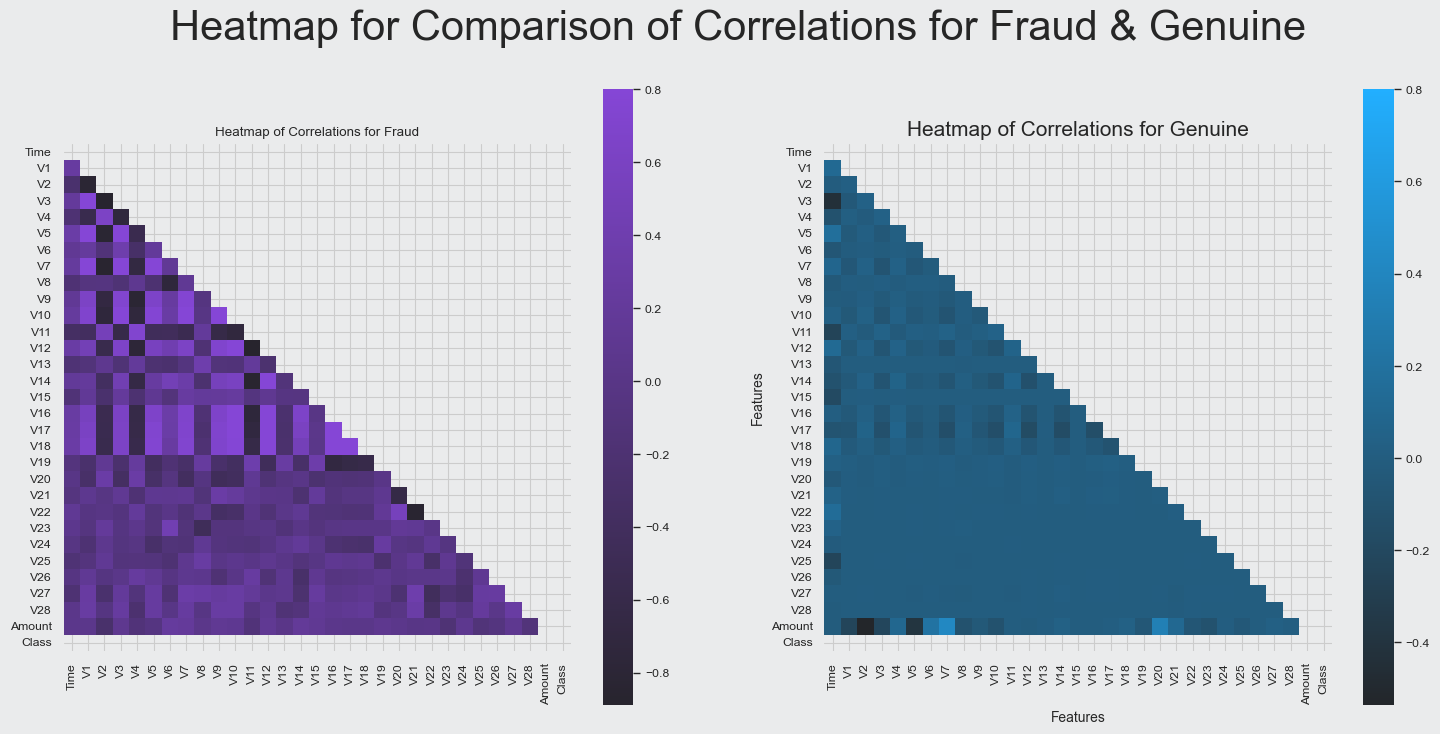

In [23]:
	
# Correlation matrix 
f, (ax1, ax2) = plt.subplots(1,2,figsize =( 18, 8))
corr = abs(df.corr())
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap((df.loc[df['Class'] ==1]).corr(), vmax = .8, square=True, ax = ax1, cmap=p.Colors.purples_c, mask=mask)
ax1.set_title('Heatmap of Correlations for Fraud')
sns.heatmap((df.loc[df['Class'] ==0]).corr(), vmax = .8, square=True, ax = ax2, cmap=p.Colors.blues_c, mask=mask)
ax2.set_title('Heatmap of Correlations for Genuine' , fontsize=15)
plt.suptitle('Heatmap for Comparison of Correlations for Fraud & Genuine', fontsize=30)
plt.xlabel('Features', fontsize=10)  # X-axis label
plt.ylabel('Features', fontsize=10)  # Y-axis label
plt.show()



## Check for Outliers : 

1. Using Box Plots : This will display box plots for each numerical feature, where outliers will be represented as individual points outside the whiskers of the box plots.

In [24]:
fraud = df[df['Class']==1]
genuine = df[df['Class']==0]

outlier_fract = len(fraud)/float(len(genuine))

print(outlier_fract)

print('Fraud cases: {}'.format(len(fraud)))

print('Genuine cases: {}'.format(len(genuine)))

0.0017304750013189597
Fraud cases: 492
Genuine cases: 284315


/var/folders/2q/0pwcfscs4hgf9m7q4fgf8qf80000gn/T/ipykernel_11264/672536737.py:8: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(x='Class', y='Amount', data=df, hue= 'Class' , palette=p.Colors.purples)


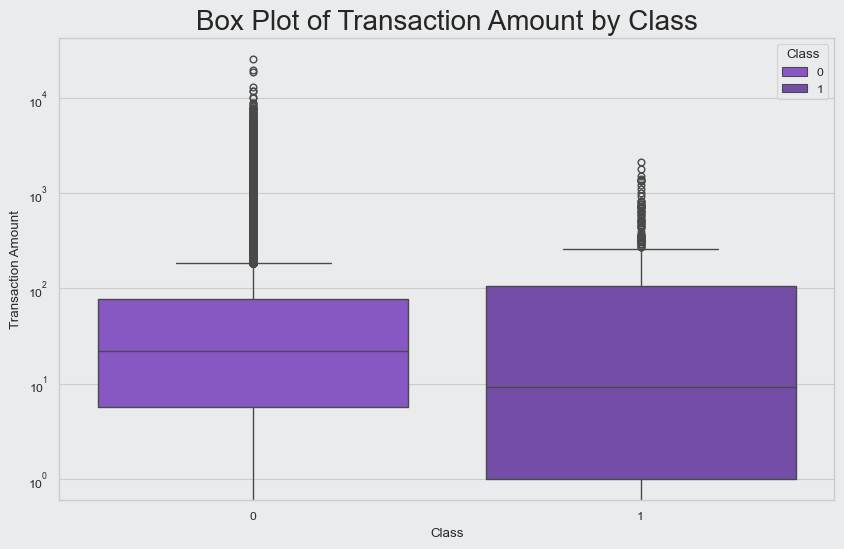

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and contains 'Class' and 'Amount' columns

# Plotting a box plot for the 'Amount' column
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=df, hue= 'Class' , palette=p.Colors.purples)
plt.title('Box Plot of Transaction Amount by Class', fontsize=20)
plt.xlabel('Class')
plt.ylabel('Transaction Amount')
plt.yscale('log')
plt.show()


/var/folders/2q/0pwcfscs4hgf9m7q4fgf8qf80000gn/T/ipykernel_11264/3964133481.py:10: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(x=df['Class'], y=df[col], palette= p.Colors.purples , hue = df['Class'])
/var/folders/2q/0pwcfscs4hgf9m7q4fgf8qf80000gn/T/ipykernel_11264/3964133481.py:10: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(x=df['Class'], y=df[col], palette= p.Colors.purples , hue = df['Class'])
/var/folders/2q/0pwcfscs4hgf9m7q4fgf8qf80000gn/T/ipykernel_11264/3964133481.py:10: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(x=df['Class'], y=df[col], palette= p.Colors.purples , hue = df['Class'])
/var/folders/2q/0pwcfscs4hgf9m7q4fgf8qf80000gn/T/ipykernel_11264/3964133481.py:10: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(x=df['Class'], y=

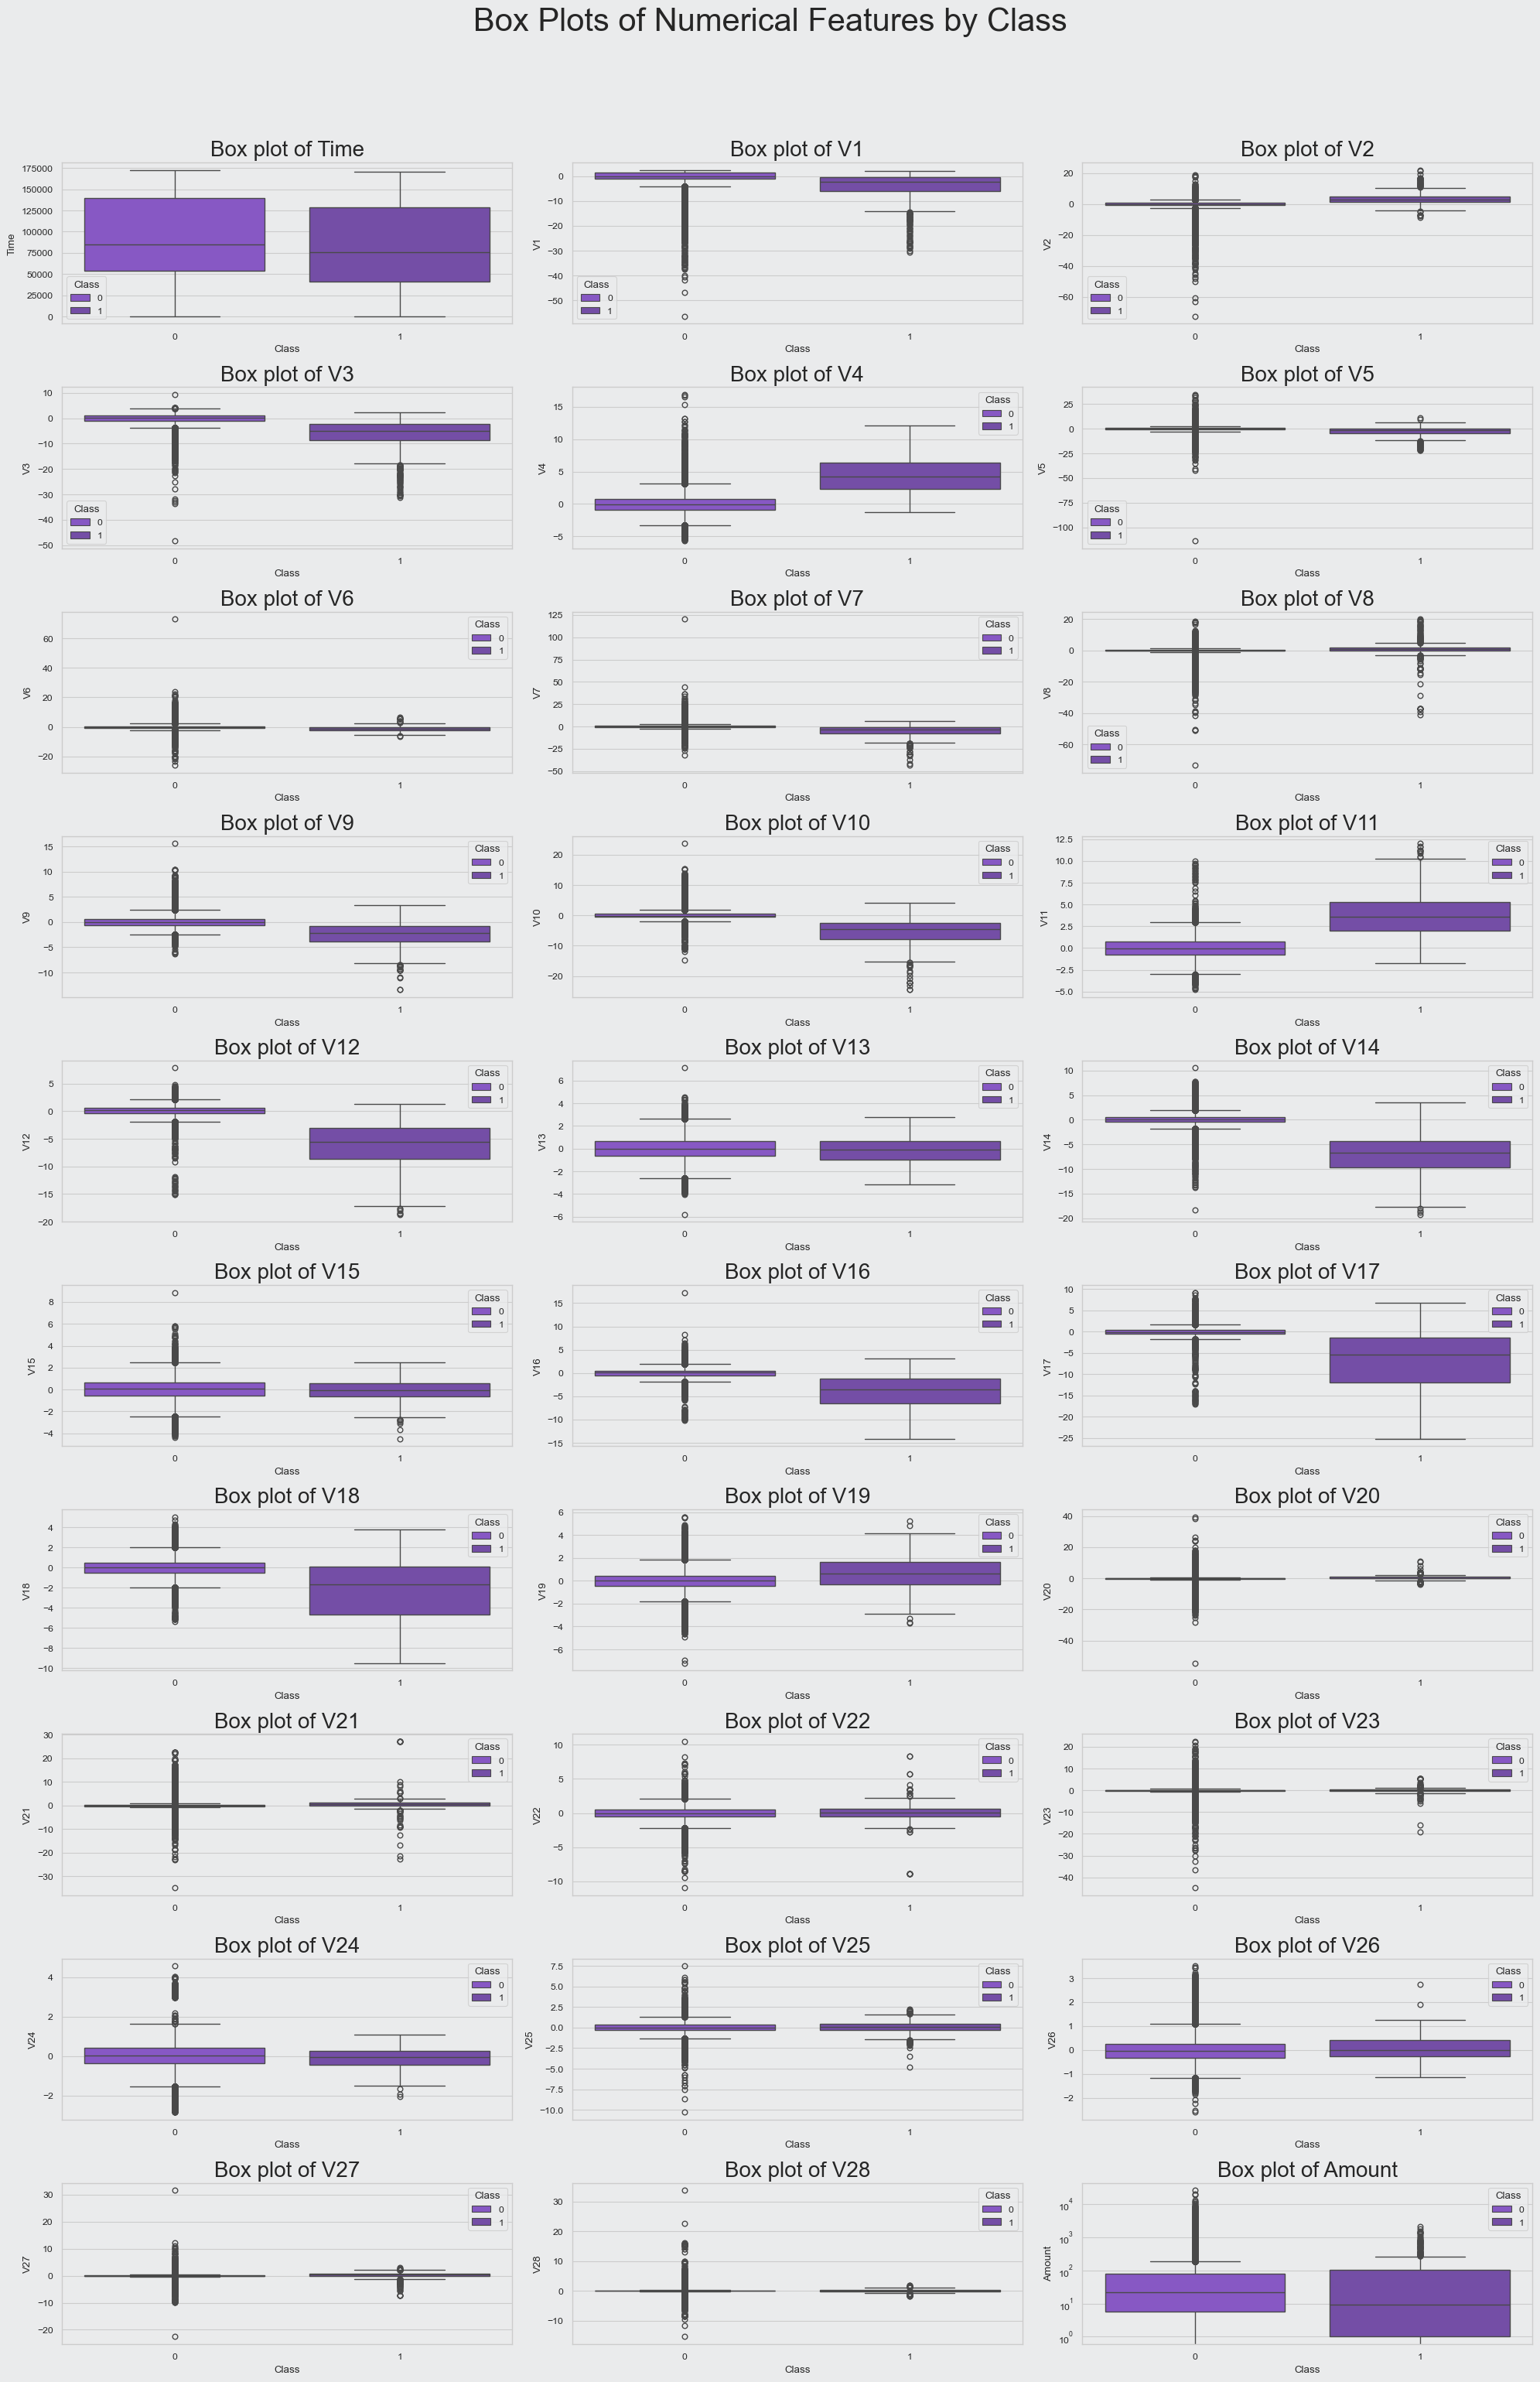

In [26]:
# Select numerical columns for visualization
numerical_cols = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

# Plotting box plots
plt.figure(figsize=(20, 35))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i)
    sns.boxplot(x=df['Class'], y=df[col], palette= p.Colors.purples , hue = df['Class'])
    plt.title(f'Box plot of {col}' , fontsize=20)
    plt.suptitle('Box Plots of Numerical Features by Class', fontsize=30)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
plt.yscale('log')
plt.show()


2. Using Z-Score: Z-score can be used to identify outliers. A Z-score tells you how many standard deviations a data point is from the mean. Data points with a Z-score greater than 3 or less than -3 are often considered outliers.This method will print the number of outliers in each column based on the Z-score criteria.

In [22]:

# Sample data
data = {'transaction_amount': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300]}
df_test = pd.DataFrame(data)

# Calculate Z-scores
df_test['z_score'] = (df_test['transaction_amount'] - df_test['transaction_amount'].mean()) / df_test['transaction_amount'].std()

# Identify outliers
outliers = df_test[(df_test['z_score'] > 3) | (df_test['z_score'] < -3)]
print("Outliers:\n", outliers)

# Optionally, exclude outliers from the dataset
df_no_outliers = df_test[(df_test['z_score'] <= 3) & (df_test['z_score'] >= -3)]
print("Data without outliers:\n", df_no_outliers)


Outliers:
 Empty DataFrame
Columns: [transaction_amount, z_score]
Index: []
Data without outliers:
     transaction_amount   z_score
0                   10 -0.928566
1                   20 -0.808751
2                   30 -0.688936
3                   40 -0.569121
4                   50 -0.449306
5                   60 -0.329491
6                   70 -0.209676
7                   80 -0.089861
8                   90  0.029954
9                  100  0.149769
10                 200  1.347918
11                 300  2.546068


In [23]:
from scipy.stats import zscore
numerical_cols = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class']

In [24]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [25]:
z_scores = df[numerical_cols].apply(zscore)

In [26]:
df.apply(zscore)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,-0.041599
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,-0.041599
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,-0.041599
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,-0.041599
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,-0.041599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.641931,-6.065842,6.099286,-6.486245,-1.459641,-3.886611,-1.956690,-3.975628,6.116573,1.742559,...,0.290602,0.154146,1.624574,-0.841000,2.756320,0.518500,2.337901,2.495529,-0.350151,-0.041599
284803,1.641952,-0.374121,-0.033356,1.342145,-0.521651,0.629040,0.794446,0.019667,0.246886,0.532299,...,0.291625,1.273781,0.019958,-1.677920,-1.163726,-0.819647,0.169641,-0.162164,-0.254117,-0.041599
284804,1.641974,0.980024,-0.182434,-2.143205,-0.393984,1.905833,2.275262,-0.239939,0.593140,0.393630,...,0.315913,0.796788,-0.060053,1.056944,0.509797,-0.181182,0.011037,-0.080467,-0.081839,-0.041599
284805,1.641974,-0.122755,0.321250,0.463320,0.487192,-0.273836,0.468155,-0.554672,0.568631,0.356887,...,0.361112,1.102451,-0.261503,0.203428,-1.091855,1.133635,0.269604,0.316687,-0.313249,-0.041599


In [27]:
# Identify outliers
outliers = (z_scores > 3) | (z_scores < -3)
# Summarize outliers by column
outliers_summary = outliers.sum()

In [28]:
print("Number of outliers in each column from total of 284807:")
print(outliers_summary)

Number of outliers in each column from total of 284807:
Time         0
V1        3701
V2        4318
V3        1987
V4        3094
V5        2945
V6        4652
V7        3401
V8        4221
V9        2293
V10       3488
V11        684
V12       3393
V13       1192
V14       3380
V15       1254
V16       2077
V17       2515
V18       1685
V19       3399
V20       4645
V21       4064
V22       1222
V23       3364
V24        657
V25       2809
V26       1047
V27       4771
V28       3264
Amount    4076
Class      492
dtype: int64


3. IQR: The Interquartile Range (IQR) is a measure of statistical dispersion and is used to describe the spread of the middle 50% of a dataset. It is defined as the range between the first quartile (Q1) and the third quartile (Q3).Q1: This is the median of the lower half of the dataset (25th percentile).
(Q3): This is the median of the upper half of the dataset (75th percentile).The IQR is a robust measure of variability that is particularly useful for detecting outliers. By focusing on the spread of the middle 50% of the data, it minimizes the impact of extreme values and provides a clearer picture of the dataset's central tendency.

In [29]:
# Print DataFrame columns
print("Columns in DataFrame:", df.columns)

# Automatically select numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("Numerical columns identified:", numerical_cols)

Columns in DataFrame: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
Numerical columns identified: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [30]:
# Check if there are numerical columns in the DataFrame
if numerical_cols.empty:
    print("No numerical columns found in the DataFrame.")
else:
    # Calculate IQR
    Q1 = df[numerical_cols].quantile(0.25)
    Q3 = df[numerical_cols].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR)))
outliers_summary = outliers.sum()
print("Number of outliers in each column using IQR:")
print(outliers_summary)

Number of outliers in each column using IQR:
Time          0
V1         7062
V2        13526
V3         3363
V4        11148
V5        12295
V6        22965
V7         8948
V8        24134
V9         8283
V10        9496
V11         780
V12       15348
V13        3368
V14       14149
V15        2894
V16        8184
V17        7420
V18        7533
V19       10205
V20       27770
V21       14497
V22        1317
V23       18541
V24        4774
V25        5367
V26        5596
V27       39163
V28       30342
Amount    31904
Class       492
dtype: int64


#### Optionally, to remove outliers

check this code

df_no_outliers = df[~outliers.any(axis=1)]

print(f"Original dataset shape: {df.shape}")

print(f"Dataset shape after removing outliers: {df_no_outliers.shape}")

## Distribution Related To Time

#### 1. Temporal Distribution


#### Observation: 

This histogram compares the temporal distribution of fraud and genuine transactions. It helps in identifying any distinct patterns or anomalies in fraudulent transactions over time.

/var/folders/2q/0pwcfscs4hgf9m7q4fgf8qf80000gn/T/ipykernel_2379/3651466750.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(genuine['hour'], bins=48, kde=True, palette=p.Colors.blues , label='Genuine Transactions')
/var/folders/2q/0pwcfscs4hgf9m7q4fgf8qf80000gn/T/ipykernel_2379/3651466750.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(fraud['hour'], bins=48, kde=True, palette=p.Colors.purples_cr, label='Fraudulent Transactions')


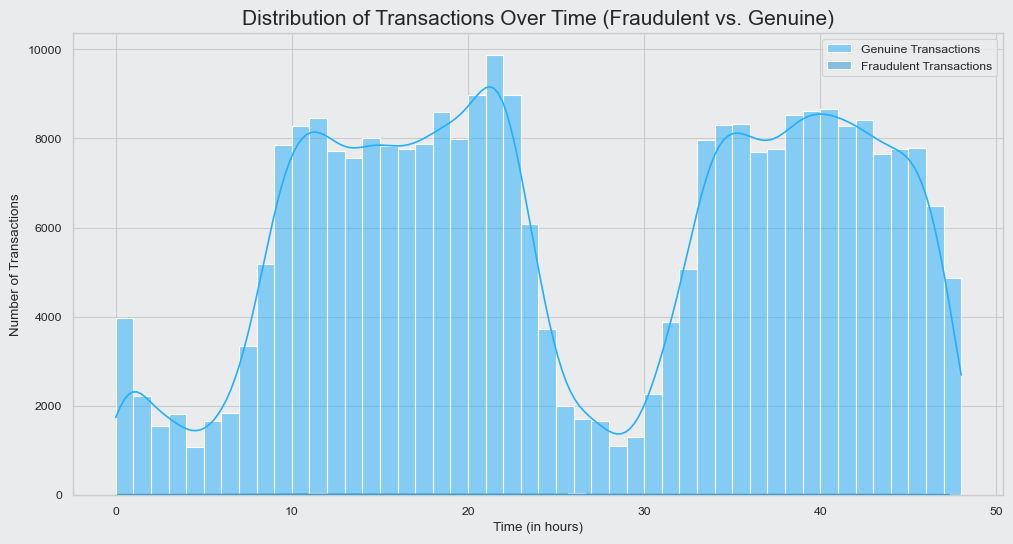

In [182]:

# Convert 'Time' to hours for better visualization
df['hour'] = df['Time'] / 3600
# Separate fraud and genuine transactions
fraud = df[df['Class'] == 1]
genuine = df[df['Class'] == 0]

# Plotting transaction frequency over time for fraud and genuine transactions
plt.figure(figsize=(12, 6))
sns.histplot(genuine['hour'], bins=48, kde=True, palette=p.Colors.blues , label='Genuine Transactions')
sns.histplot(fraud['hour'], bins=48, kde=True, palette=p.Colors.purples_cr, label='Fraudulent Transactions')
plt.title('Distribution of Transactions Over Time (Fraudulent vs. Genuine)' , fontsize = 15)
plt.xlabel('Time (in hours)')
plt.ylabel('Number of Transactions')
plt.legend()
plt.show()

#### 2. Temporal Patterns

 #### Observation: 
 
 This line plot shows how the average transaction amount varies by hour of the day. It helps in understanding spending patterns and whether fraudulent transactions exhibit specific patterns at certain times.

/var/folders/2q/0pwcfscs4hgf9m7q4fgf8qf80000gn/T/ipykernel_2379/778206817.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='hour', y='Amount', data=hourly_data, marker='o', palette=p.Colors.blues)


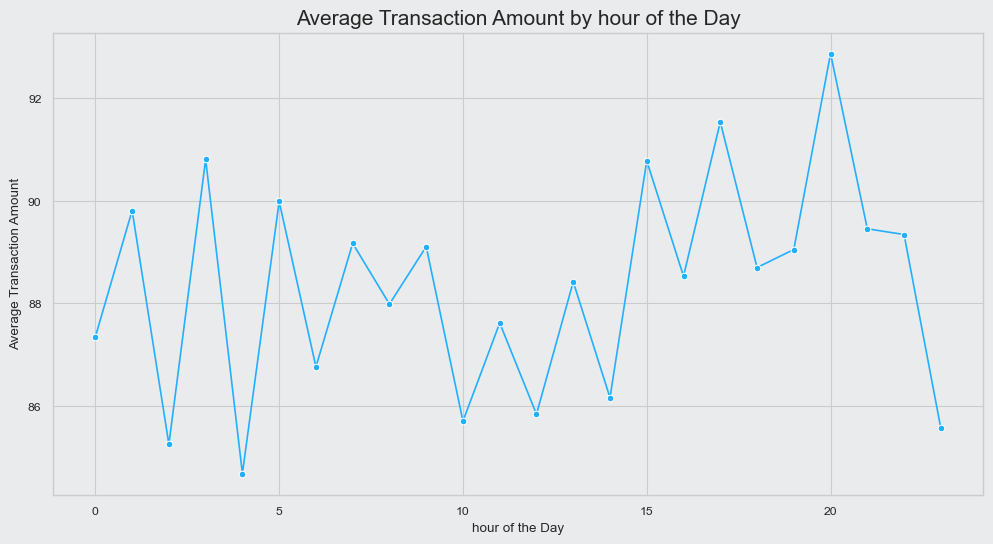

In [184]:
# Grouping transactions by hour and calculating average transaction amount
df['hour'] = df['Time'] % 24  # Extract hour of the day
hourly_data = df.groupby('hour').mean()

# Plotting average transaction amount by hour
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='Amount', data=hourly_data, marker='o', palette=p.Colors.blues)
plt.title('Average Transaction Amount by hour of the Day' , fontsize = 15)
plt.xlabel('hour of the Day')
plt.ylabel('Average Transaction Amount')
plt.show()


#### By leveraging the 'Time' data effectively in EDA process, we can uncover temporal patterns, analyze transaction behavior over different time intervals, and gain insights that are valuable for detecting fraudulent activities in credit card transactions

#### Comparison of amount and time distributions

The first histogram (in purple) shows the distribution of the amount values, indicating how frequently different transaction amounts occur.

The second histogram (in lightblue) shows the distribution of the time values, indicating the frequency of transactions over time.

Amount Distribution: The first histogram will provide insights into the transaction amounts. We can observe if there are common transaction values, detect outliers, and understand the general spread of transaction amounts.

Time Distribution: The second histogram will provide insights into the transaction times. You can see if transactions are evenly distributed over time, if there are specific periods with more transactions, and identify any time-based patterns.

Comparative Analysis: By displaying both histograms together, it’s easier to compare the distributions and possibly relate transaction amounts to specific times, if any pattern exists.

sns.heatmap((df.loc[df['Class'] ==0]).corr(), vmax = .8, square=True, ax = ax2, cmap=p.Colors.purples_c, mask=mask)

/var/folders/2q/0pwcfscs4hgf9m7q4fgf8qf80000gn/T/ipykernel_2379/2829418492.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(Amount1, bins=100, ax=axs[0], palette=p.Colors.purples)
/var/folders/2q/0pwcfscs4hgf9m7q4fgf8qf80000gn/T/ipykernel_2379/2829418492.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(Time1, bins=100, ax=axs[1],  palette=p.Colors.blues_cr)


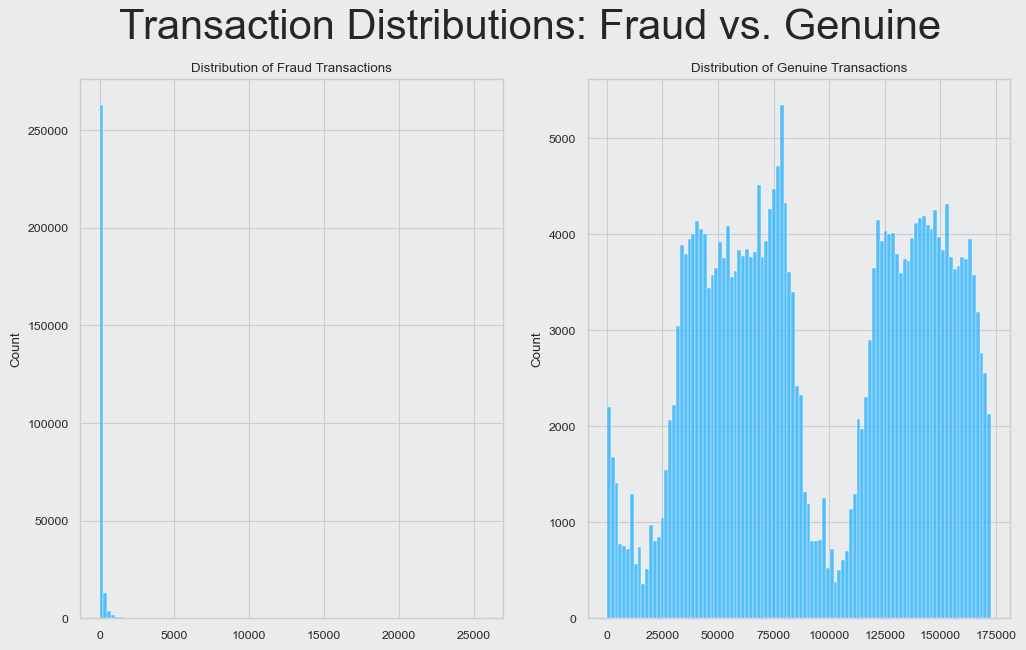

In [198]:
fig, axs = plt.subplots(ncols=2,figsize=(12,7))
Amount1= df['Amount'].values
Time1= df['Time'].values

sns.histplot(Amount1, bins=100, ax=axs[0], palette=p.Colors.purples)
axs[0].set_title("Distribution of Fraud Transactions")

sns.histplot(Time1, bins=100, ax=axs[1],  palette=p.Colors.blues_cr)
axs[1].set_title("Distribution of Genuine Transactions" )
plt.suptitle('Transaction Distributions: Fraud vs. Genuine', fontsize=30)

plt.show()

### Distribution Related To Amount

#### Observations:

With fraud transactions, the average amount of fraud is 122.22 , the highest is 2125 , the lowest is 0 and the maximum amount is 1 with 113 times.

In [34]:
pd.concat([fraud['Amount'].describe(), normal['Amount'].describe()], axis=1)

,Amount,Amount
count,492.000000,284315.000000
mean,122.211321,88.291022
std,256.683288,250.105092
min,0.000000,0.000000
25%,1.000000,5.650000
50%,9.250000,22.000000
75%,105.890000,77.050000
max,2125.870000,25691.160000


In [35]:
fraud['Amount'].value_counts().head()

Amount
1.00     113
0.00      27
99.99     27
0.76      17
0.77      10
Name: count, dtype: int64

### 1. Temporal Distribution of Transactions


Exploring the relationship between the 'Time' (transaction timestamp) and 'Amount' (transaction amount) can reveal important insights into fraudulent activities

Explanation: This scatter plot shows each transaction as a point where the x-axis represents the 'Time' and the y-axis represents the 'Amount'. The plot helps visualize how transaction amounts are distributed over time. Patterns in this plot can indicate if certain times are associated with higher transaction amounts, potentially highlighting periods when fraudsters may attempt larger transactions.

/var/folders/2q/0pwcfscs4hgf9m7q4fgf8qf80000gn/T/ipykernel_2379/2216382847.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='hour', y='Amount', data=df, palette=p.Colors.blues ,alpha=0.5)


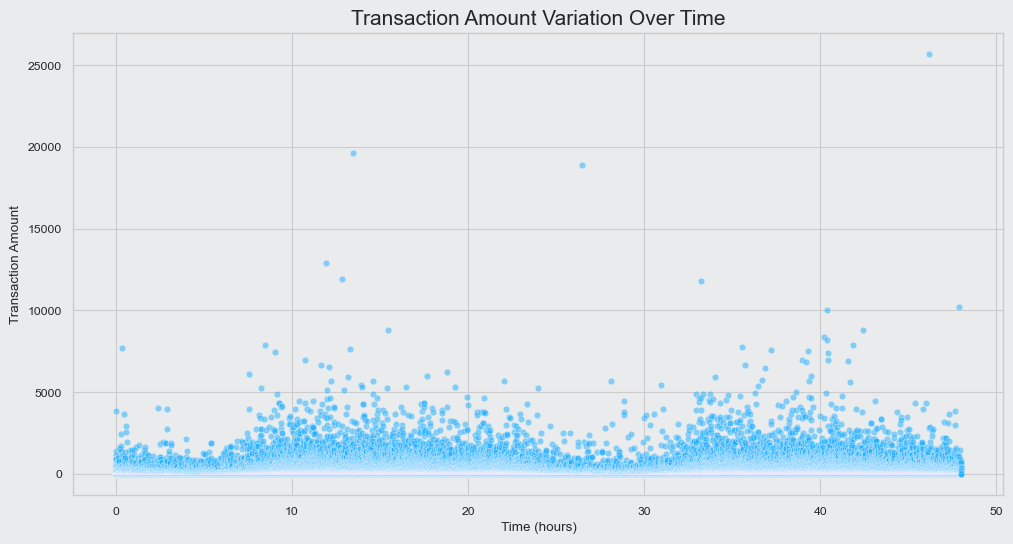

In [199]:
# Convert 'Time' to hours for better visualization
df['hour'] = df['Time'] / 3600
  # assuming time is in seconds, convert to hours

# Group by hour and calculate average transaction amount
average_amount_by_hour = df.groupby('hour')['Amount'].mean().reset_index()

# # Plotting transaction amount over time
plt.figure(figsize=(12, 6))
sns.scatterplot(x='hour', y='Amount', data=df, palette=p.Colors.blues ,alpha=0.5)
plt.title('Transaction Amount Variation Over Time' , fontsize=15)
plt.xlabel('Time (hours)')
plt.ylabel('Transaction Amount')
plt.show()

### 2. Temporal Patterns in Fraudulent Transactions

Explanation: This scatter plot specifically shows fraudulent transactions (colored in red) plotted against 'Time' and 'Amount'. It helps in identifying any temporal patterns in fraudulent activities, such as whether fraud tends to occur more frequently during certain time periods or involves transactions of specific amounts.

/var/folders/2q/0pwcfscs4hgf9m7q4fgf8qf80000gn/T/ipykernel_2379/2788213878.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='hour', y='Amount', data=fraudulent, alpha=0.5, palette=p.Colors.purples)


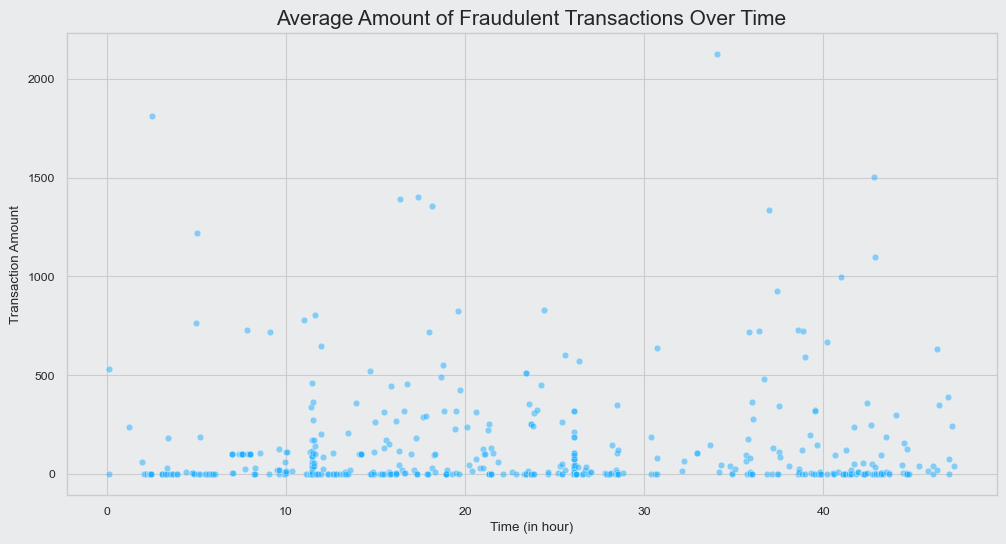

In [203]:

# Convert 'Time' to hours for better visualization
df['hour'] = df['Time'] / 3600
# assuming time is in seconds, convert to hours
fraudulent = df[df['Class'] == 1]


  # Group by hour and calculate average transaction amount
average_amount_by_hour = df.groupby('hour')['Amount'].mean().reset_index()

# Plotting fraudulent transaction amount over time
plt.figure(figsize=(12, 6))
sns.scatterplot(x='hour', y='Amount', data=fraudulent, alpha=0.5, palette=p.Colors.purples)
plt.title('Average Amount of Fraudulent Transactions Over Time' , fontsize=15)
plt.xlabel('Time (in hour)')
plt.ylabel('Transaction Amount')
plt.show()

### 3. Average Transaction Amount by Time

Explanation: This line plot shows how the average transaction amount varies throughout the day (assuming 'Time' is converted to hours). It helps in understanding the typical transaction sizes during different times of the day, which can aid in identifying deviations that might indicate fraudulent activities.

/var/folders/2q/0pwcfscs4hgf9m7q4fgf8qf80000gn/T/ipykernel_2379/2250001075.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='hour', y='Amount', data=average_amount_by_hour, marker='o', palette=p.Colors.blues)


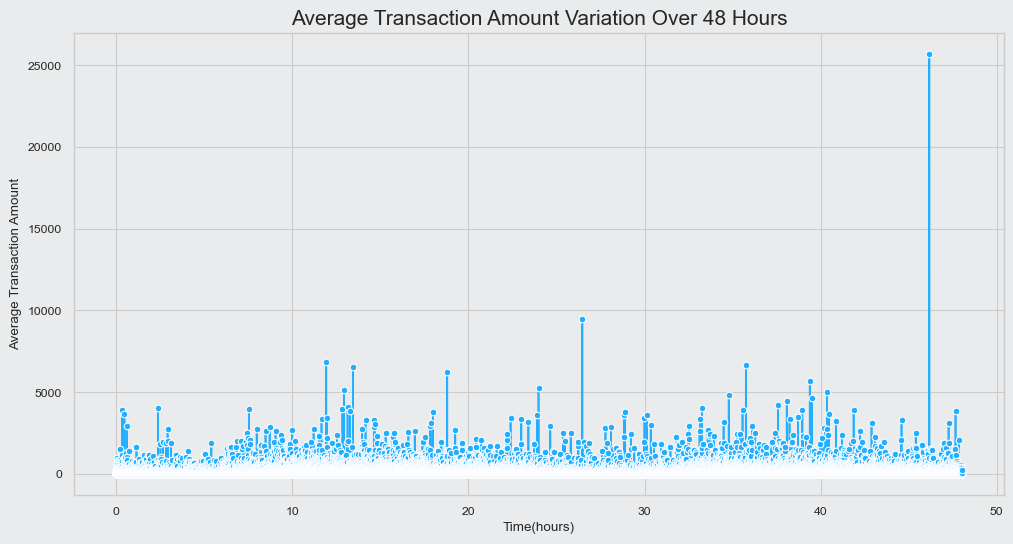

In [202]:
# Convert 'Time' to hours for better visualization
df['hour'] = df['Time'] / 3600

# Group by hour and calculate average transaction amount
average_amount_by_hour = df.groupby('hour')['Amount'].mean().reset_index()

# Plotting average transaction amount by hour
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='Amount', data=average_amount_by_hour, marker='o', palette=p.Colors.blues)
plt.title('Average Transaction Amount Variation Over 48 Hours' , fontsize=15)
plt.xlabel('Time(hours)')
plt.ylabel('Average Transaction Amount')
plt.show()


### 4. Scatterplot of transaction time and amount

By distribution we can see transaction amounts are very small, where as time is distributed.
### Observation 

Also, the more transaction happens within the same period of time, the more likely the transaction amount rises. Due to the prior PCA procedure, most predictors appear to be uncorrelated 

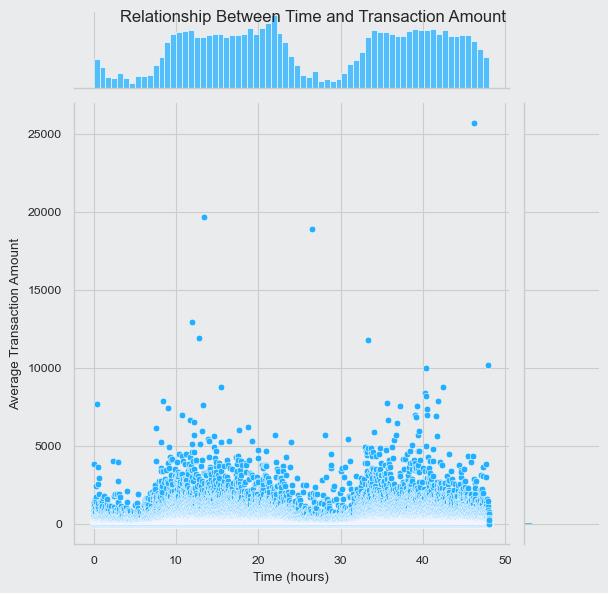

In [214]:
# Convert 'Time' to hours for better visualization
df['hour'] = df['Time'] / 3600
sns.jointplot(x="hour", y="Amount", palette=p.Colors.blues, data=df[["hour","Amount" ]])
plt.xlabel('Time (hours)')
plt.ylabel('Average Transaction Amount')
plt.suptitle("Relationship Between Time and Transaction Amount", fontsize=12)
plt.show()

### 5. Correlation Analysis : Finally, the relationship between 'Time' and 'Amount' using correlation coefficients:

Explanation: The correlation coefficient quantifies the strength and direction of the linear relationship between 'Time' and 'Amount'. A positive correlation indicates that as 'Time' increases, 'Amount' also tends to increase (or vice versa), while a negative correlation indicates an inverse relationship.

In [41]:
# Calculate correlation coefficient between 'Time' and 'Amount'
correlation = df['Time'].corr(df['Amount'])
print(f"Correlation between Time and Amount: {correlation}")


Correlation between Time and Amount: -0.010596373389029256


### Conclusion

Analyzing the relationship between 'Time' and 'Amount' in a credit card fraud analysis dataset helps in understanding transaction behaviors and patterns, especially those associated with fraudulent activities. By visualizing and quantifying these relationships, we can uncover insights that are crucial for detecting and preventing fraud in credit card transactions. 